In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys

sys.path.append(r'C:\Users\kpourg01\Desktop\Work\Code\tool')
from mytool import UAVTrafficTool
tool = UAVTrafficTool.Wiz()

In [2]:
dataset_information={
    'day':'24Oct',
    'month':'10',
    'drone':'2',
    'time_period':'0900_0930',
    'road':'Panepistimiou',
    'intersection':'Panepistimiou-Omirou'
    }

nickname = f'Drone{dataset_information.get('drone')}_{dataset_information.get('day')}_{dataset_information.get('time_period')}'
file_path= fr'C:\Users\kpourg01\Desktop\Work\Code\pNEUMA\datasets\{dataset_information.get('road')}/2018{dataset_information.get('month')}{dataset_information.get('day')[:2]}_d{dataset_information.get('drone')}_{dataset_information.get('time_period')}.csv'

In [3]:
#sampling period must be integer multiple of 0.04
sampling_period_dataloading=0.2
time_decimals=1
#===========================================================================================
import DatasetExample.DataExamplePneuma as DEP
Raw_VD = DEP.getInfo_PNEUMA(file_path=file_path, sampling_period=sampling_period_dataloading, time_decimals=time_decimals, position_smoothing=2)

In [4]:
sampling_period_flowcount=1
sampling_frequency = 1/sampling_period_flowcount
#----------------------------------------------------
time_axis = np.round(np.arange(min([min(set) for set in Raw_VD.get('time')]),max([max(set) for set in Raw_VD.get('time')])+sampling_period_flowcount,sampling_period_flowcount),decimals=time_decimals).tolist()
#----------------------------------------------------
WGS=True
#----------------------------------------------------
ll_lat,ll_lon = 37.97811671602297, 23.733975874806358
lr_lat,lr_lon = 37.97876143771719, 23.735210640421347
ur_lat,ur_lon = 37.97938790250702, 23.734674127747873
ul_lat,ul_lon = 37.97874587304865, 23.73345028699124
#----------------------------------------------------
clat,clon = 37.97866950849114, 23.734362398006162
#----------------------------------------------------
bbox = [(ll_lat,ll_lon), 
        (lr_lat,lr_lon),
        (ur_lat,ur_lon),
        (ul_lat,ul_lon)]
#----------------------------------------------------
SpatioTemporalInfo  =  {
                        'WGS':WGS,
                        'bbox':bbox,
                        'x center': clon,
                        'y center': clat,
                        'time axis': time_axis
                        }

In [5]:
cursed_ids={}
#================================================================
cursed_ids['24Oct_0900_0930']=[208,1442,75,2450,140,1151,1469,628,2941,154,917]
cursed_ids['24Oct_0930_1000']=[257,2379,1482,2446,2716,270]
cursed_ids['24Oct_1000_1030']=[47,1015,1599,2415,1306,1018,1118,1948,1810,1286,105]
cursed_ids['24Oct_1030_1100']= []
#================================================================
cursed_ids['29Oct_0800_0830']=[]
cursed_ids['29Oct_0830_0900']=[]
cursed_ids['29Oct_0900_0930']=[184,570,2014,2497,158]
cursed_ids['29Oct_0930_1000']=[]
cursed_ids['29Oct_1000_1030']=[]
#================================================================
cursed_ids['30Oct_0800_0830']=[145,1544,157,310,183,154,305,461,312,174,453] 
cursed_ids['30Oct_0830_0900']=[]
cursed_ids['30Oct_0900_0930']=[]
#================================================================
cursed_ids['01Nov_0800_0830']=[]
cursed_ids['01Nov_0830_0900']=[1130]
cursed_ids['01Nov_0900_0930']=[]
cursed_ids['01Nov_0930_1000']=[123,1498]
cursed_ids['01Nov_1000_1030']=[]
#================================================================

In [11]:
DataLoader = tool.DataLoader(Raw_VD=Raw_VD, WGS=WGS, bbox=bbox)
Filtered_VD = DataLoader.get_Filtered_VD(cursed_ids=cursed_ids[f'{dataset_information.get('day')}_{dataset_information.get('time_period')}'])
Analysis = tool.Analysis(Filtered_VD,SpatioTemporalInfo)
Visualization = tool.Visualization(Filtered_VD, SpatioTemporalInfo)

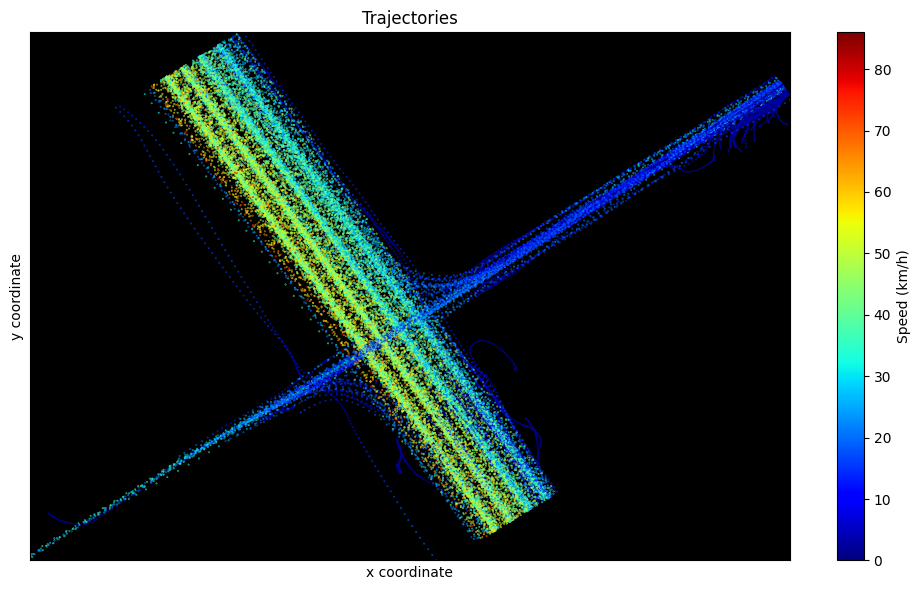

In [13]:
Visualization.Trajectories()

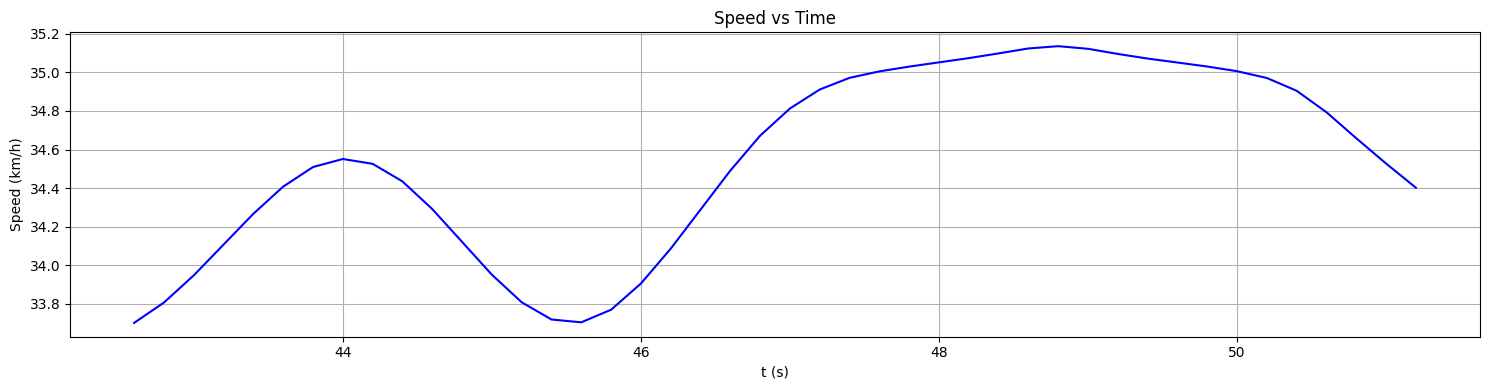

In [14]:
Visualization.Speed(id=0)

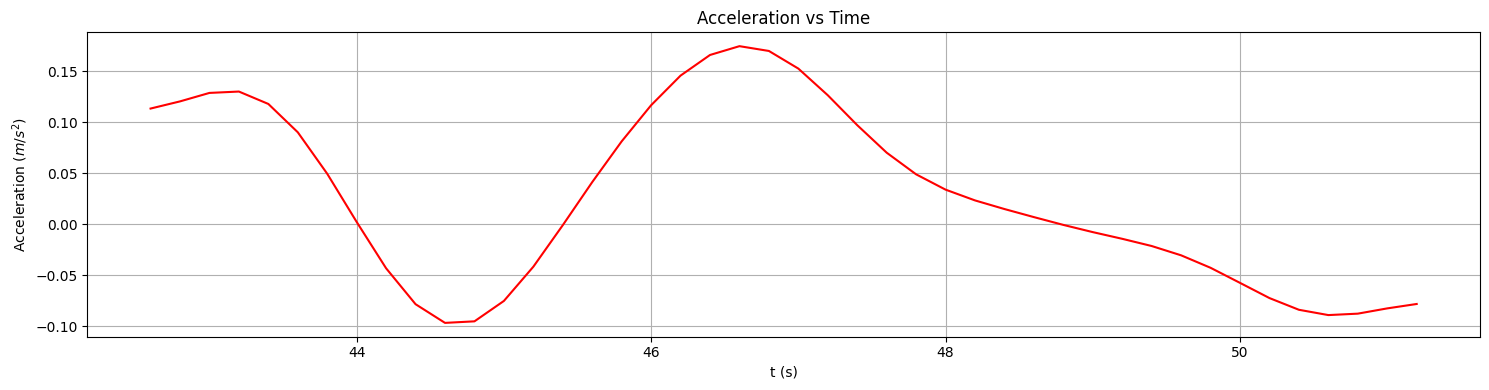

In [15]:
Visualization.Acceleration(id=0)

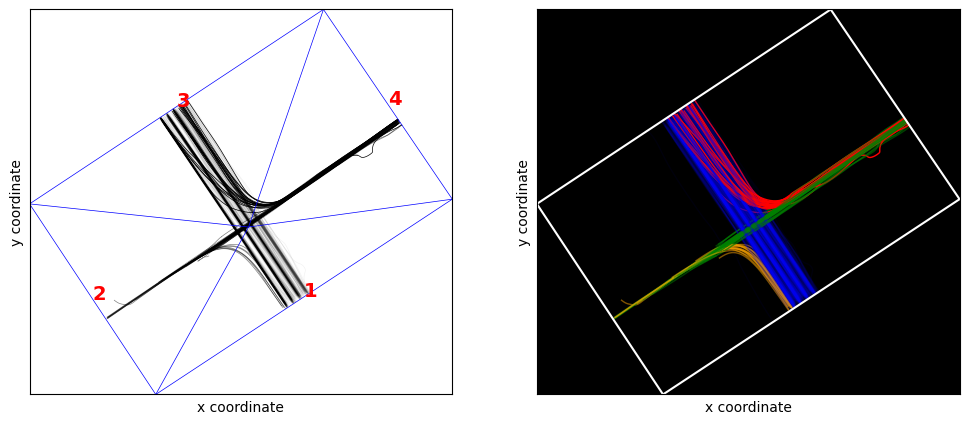

In [16]:
OD_pairs = Analysis.get_ODPairs()
valid_OD_pairs = [(1,3),(1,2),(4,3),(4,2)]
Visualization.Trajectories_OD(valid_OD_pairs)

In [17]:
#----------------------------------------------------------------------
VD_13_12 = Analysis.get_OD_VD(desirable_pairs=[(1,3),(1,2)])
Analysis_13_12 = tool.Analysis(VD_13_12,SpatioTemporalInfo)
Visualization_13_12 = tool.Visualization(VD_13_12,SpatioTemporalInfo)
#----------------------------------------------------------------------
VD_43_42 = Analysis.get_OD_VD(desirable_pairs=[(4,3),(4,2)])
Analysis_43_42 = tool.Analysis(VD_43_42,SpatioTemporalInfo)
Visualization_43_42 = tool.Visualization(VD_43_42,SpatioTemporalInfo)

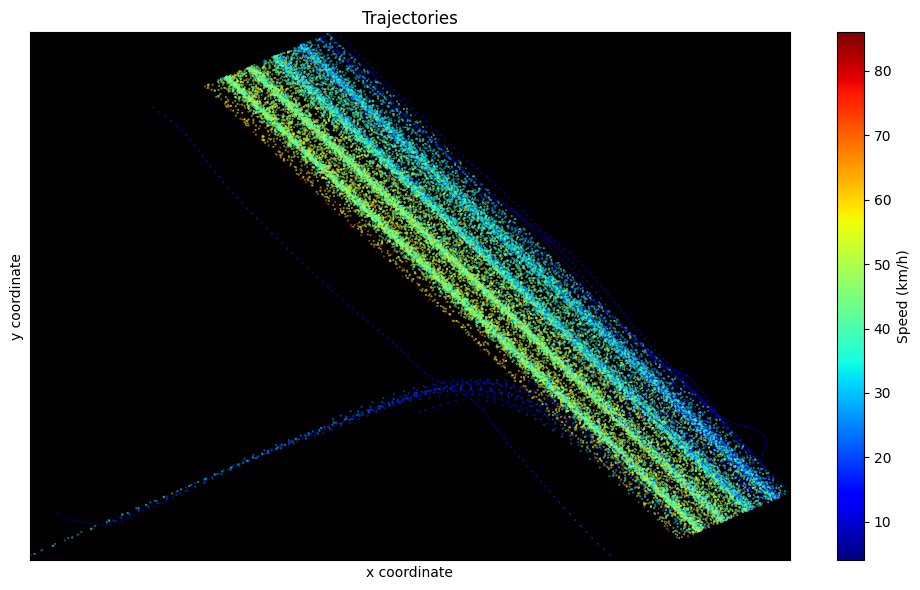

In [21]:
Visualization_13_12.Trajectories()

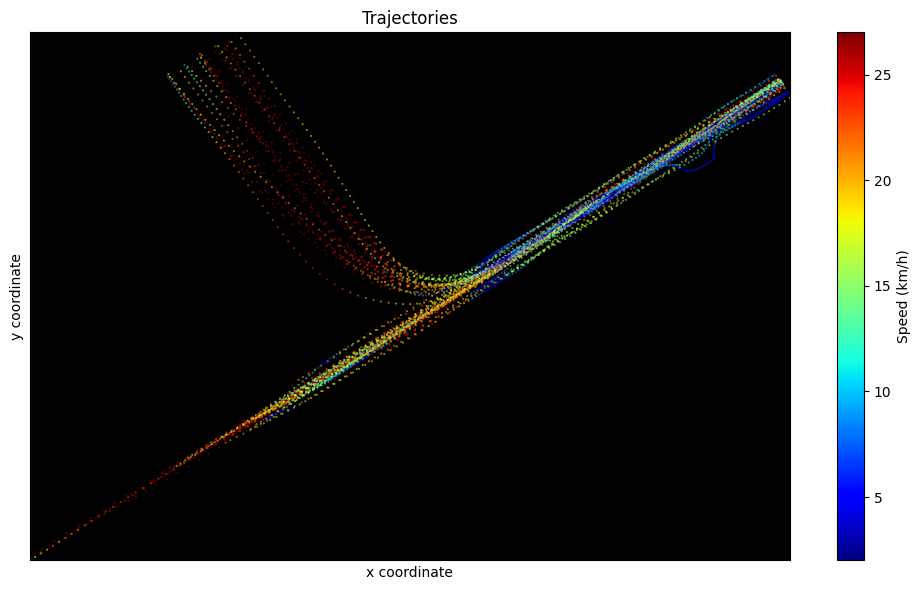

In [22]:
Visualization_43_42.Trajectories()

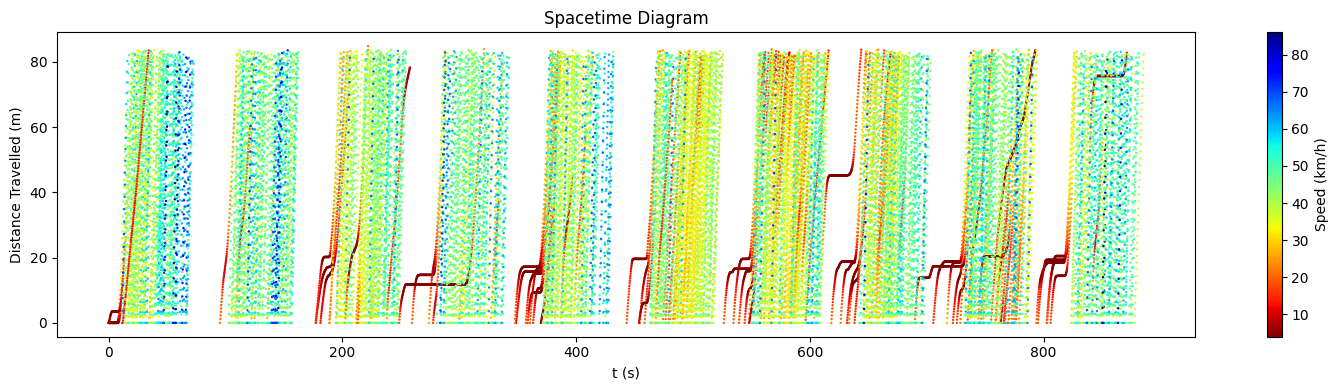

In [18]:
Visualization_13_12.SpacetimeDiagram()

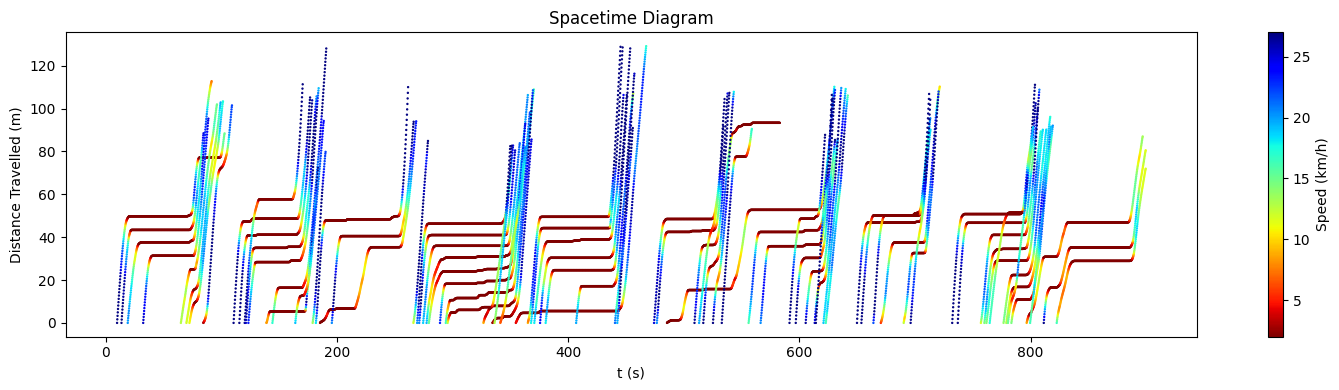

In [20]:
Visualization_43_42.SpacetimeDiagram()